### CS5691 Assignment 3

##### Submitted by: Vennapareddy Abhigna, Roll Number: ME19B059

In [1]:
import numpy as np
import pandas as pd
import os
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from striprtf.striprtf import rtf_to_text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

In [2]:
dir_path = r"C:/Users/V-ABHIGNA/Desktop/siri/Semesters/Sem 6/moodle/CS5691 - prml/Assignment 3/PRML_assignment3/test"
#replace path with the test folder

In [3]:
k=len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])-1
k
#not considering .DS_Store file, remove -1 if that file is not there

2

##### https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download

In [4]:
dfo=pd.read_csv("spam.csv",encoding='latin-1',skiprows = 0)
dfo

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
dfo.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
dfo

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
dfn = pd.read_csv("spam_ham_dataset.csv")
dfn.drop(['Unnamed: 0', 'label_num'], axis=1, inplace=True)
dfn.rename(columns={'label': 'v1', 'text': 'v2'}, inplace=True)
dfn

,v1,v2
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [7]:
df=pd.concat([dfo, dfn],ignore_index=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,Subject: put the 10 on the ft\r\nthe transport...
10739,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10740,ham,Subject: calpine daily gas nomination\r\n>\r\n...
10741,ham,Subject: industrial worksheets for august 2000...


Text(0.5, 1.0, 'Spam vs Ham')

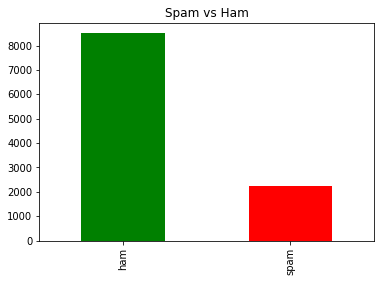

In [8]:
values = pd.value_counts(df["v1"])
values.plot(kind= 'bar', color= ["green", "red"])
plt.title('Spam vs Ham')

Text(0.5, 1.0, 'Spam vs Ham')

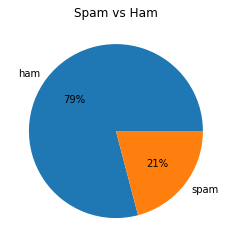

In [9]:
values.plot(kind = 'pie',autopct='%1.0f%%')
plt.ylabel('')
plt.title('Spam vs Ham')

In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.describe()

,v1,v2
count,10743,10743
unique,2,10162
top,ham,"Sorry, I'll call later"
freq,8497,30


In [12]:
y=df['v1']
y

0         ham
1         ham
2        spam
3         ham
4         ham
         ... 
10738     ham
10739     ham
10740     ham
10741     ham
10742    spam
Name: v1, Length: 10743, dtype: object

In [13]:
y=y.map({'spam':1,'ham':0})
y

0        0
1        0
2        1
3        0
4        0
        ..
10738    0
10739    0
10740    0
10741    0
10742    1
Name: v1, Length: 10743, dtype: int64

In [14]:
arr = []
for i in range(k):
    name = 'email' + str(i+1)
    with open(dir_path+'/'+name+'.txt') as file:
        file_contents = file.read()
        text = rtf_to_text(file_contents)
        text=[text]
    arr.append(text)

In [15]:
df1=pd.DataFrame(arr)
df1.columns={'v2'}
df1

,v2
0,"Dear Sir,\n\nPRML quiz was the first exam we h..."
1,"Dear Beneficiary,\n\nThe United Nations Compen..."


In [16]:
temp = pd.concat([df['v2'], df1['v2']],ignore_index=True)
temp

0        Go until jurong point, crazy.. Available only ...
1                            Ok lar... Joking wif u oni...
2        Free entry in 2 a wkly comp to win FA Cup fina...
3        U dun say so early hor... U c already then say...
4        Nah I don't think he goes to usf, he lives aro...
                               ...                        
10740    Subject: calpine daily gas nomination\r\n>\r\n...
10741    Subject: industrial worksheets for august 2000...
10742    Subject: important online banking alert\r\ndea...
10743    Dear Sir,\n\nPRML quiz was the first exam we h...
10744    Dear Beneficiary,\n\nThe United Nations Compen...
Name: v2, Length: 10745, dtype: object

In [17]:
extraction_feature = feature_extraction.text.CountVectorizer(stop_words = 'english')
features = extraction_feature.fit_transform(temp)
features.shape

(10745, 54003)

In [18]:
X_test=features[-k:,:]
X = features[:-k,:]

In [19]:
order = np.arange(X.shape[0])
np.random.shuffle(order)
train = order[0:int(0.75*X.shape[0])]
test = order[int(0.75*X.shape[0]):X.shape[0]]

In [20]:
y_train = np.array(y)[train]
y_test = np.array(y)[test]

In [21]:
x_train = X[train]
x_test = X[test]

### SVM - Gaussian

In [22]:
C_list = np.arange(10, 200, 10)
score_train = np.zeros(len(C_list))
score_test = np.zeros(len(C_list))
i = 0
for c in C_list:
    print(c)
    svc = svm.SVC(C=c)
    svc.fit(x_train, y_train)
    score_test[i] = svc.score(x_test, y_test)
    score_train[i] = svc.score(x_train, y_train)
    i = i + 1 

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [23]:
matrix = np.matrix(np.c_[C_list, score_train, score_test])
obs = pd.DataFrame(data = matrix, columns = ['C', 'Train_Accuracy', 'Test_Accuracy'])
obs

,C,Train_Accuracy,Test_Accuracy
0,10.0,0.991932,0.972822
1,20.0,0.995159,0.971705
2,30.0,0.996525,0.971705
3,40.0,0.997766,0.970588
4,50.0,0.998759,0.970961
5,60.0,0.998883,0.969844
6,70.0,0.999255,0.968354
7,80.0,0.999379,0.967238
8,90.0,0.999379,0.967982
9,100.0,0.999628,0.967982


In [28]:
best_C = obs[obs.Test_Accuracy == obs.Test_Accuracy.max()]['C']
best_C

0    10.0
Name: C, dtype: float64

##### Best C for sigmoid function

In [29]:
svc = svm.SVC(C=best_C)

In [30]:
svc.fit(x_train, y_train)

SVC(C=0    10.0
Name: C, dtype: float64, break_ties=False, cache_size=200,
    class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma='scale', kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [31]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
score_test = svc.score(x_test, y_test)
score_train = svc.score(x_train, y_train)

In [32]:
score_train

0.9919324810723594

In [33]:
score_test

0.9728220402084885

In [34]:
confusion = metrics.confusion_matrix(y_test, y_pred_test)
pd.DataFrame(data = confusion, columns = ['Predicted 0', 'Predicted 1'],index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,2121,19
Actual 1,54,492


### Prediction on our test emails

In [35]:
svc.predict(X_test)

array([0, 1], dtype=int64)

### SVM - Sigmoid

In [36]:
C_list = np.arange(10, 200, 10)
score_train = np.zeros(len(C_list))
score_test = np.zeros(len(C_list))
i = 0
for c in C_list:
    print(c)
    svc = svm.SVC(C=c, kernel='sigmoid')
    svc.fit(x_train, y_train)
    score_test[i] = svc.score(x_test, y_test)
    score_train[i] = svc.score(x_train, y_train)
    i = i + 1 

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [37]:
matrix = np.matrix(np.c_[C_list, score_train, score_test])
obs = pd.DataFrame(data = matrix, columns = ['C', 'Train_Accuracy', 'Test_Accuracy'])
obs

,C,Train_Accuracy,Test_Accuracy
0,10.0,0.947127,0.928891
1,20.0,0.945017,0.925168
2,30.0,0.966737,0.932614
3,40.0,0.939928,0.913999
4,50.0,0.937818,0.913254
5,60.0,0.935956,0.910648
6,70.0,0.935336,0.909531
7,80.0,0.934839,0.908414
8,90.0,0.934219,0.906925
9,100.0,0.933598,0.905808


In [38]:
best_C = obs[obs.Test_Accuracy == obs.Test_Accuracy.max()]['C']
best_C

2    30.0
Name: C, dtype: float64

##### Best C for sigmoid function

In [39]:
svc = svm.SVC(C=best_C,kernel='sigmoid')

In [40]:
svc.fit(x_train, y_train)

SVC(C=2    30.0
Name: C, dtype: float64, break_ties=False, cache_size=200,
    class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma='scale', kernel='sigmoid', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
score_test = svc.score(x_test, y_test)
score_train = svc.score(x_train, y_train)

In [42]:
score_train

0.9667369988829589

In [43]:
score_test

0.9326135517498139

In [44]:
confusion = metrics.confusion_matrix(y_test, y_pred_test)
pd.DataFrame(data = confusion, columns = ['Predicted 0', 'Predicted 1'],index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,2051,89
Actual 1,92,454


### Prediction on our test emails

In [45]:
svc.predict(X_test)

array([0, 1], dtype=int64)